## 1. Import modules

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## 2. Reading the Data

In [3]:
#functional programming

#declare global variables

PROJECT_DIR= r"C:\Users\jinni\Desktop\flights-sagemaker-project"
DATA_DIR= "data"

In [4]:
def get_data(name):
    file_name= f"{name}.csv"
    file_path= os.path.join(PROJECT_DIR, DATA_DIR, file_name)
    return pd.read_csv(file_path)

In [5]:
flights= get_data("flight_price")
flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- The dataset contains 10,683 rows and 11 columns.
- Columns `Route` and `Total_Stops` have missing values.
- The data types of some features (date-time) are not appropriate.

## 3. Preliminary Analysis
1. Check data types
2. Check for duplicates
3. Observations

## 3.1 Check Data Types

In [7]:
flights.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [8]:
flights.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
value= flights.Date_of_Journey.iloc[6]
value #currently a string object, has to be date-time

'12/03/2019'

In [10]:
#same for dep_time and Arrival_time
value= flights.Dep_Time.iloc[6]
value #time as a string

'18:55'

In [11]:
value= flights.Duration.iloc[6]
value #hours and mins, can convert only to one (eg minutes) and type int.

'15h 30m'

In [12]:
value= flights.Total_Stops.iloc[1:7]
value

1     2 stops
2     2 stops
3      1 stop
4      1 stop
5    non-stop
6      1 stop
Name: Total_Stops, dtype: object

- Above, the value can just be an integer, 0 for non-stop and 1 for 1-stop etc.

## 3.2 Check for Duplicates

In [13]:
#panda functionality
flights.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Length: 10683, dtype: bool

- The above function returns a Boolean value. If it is True, means the row is a duplicate. Hence we can sum this value to see the total rows that are duplicated.
- True =1, False=0 hence, 220 duplicates.
- Need to filter these particular rows (using loc) and look at them.

In [14]:
flights.duplicated().sum()

220

In [15]:
(
    flights
    .loc[flights.duplicated()]
)

#this shows those 220 rows that are duplicate.

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


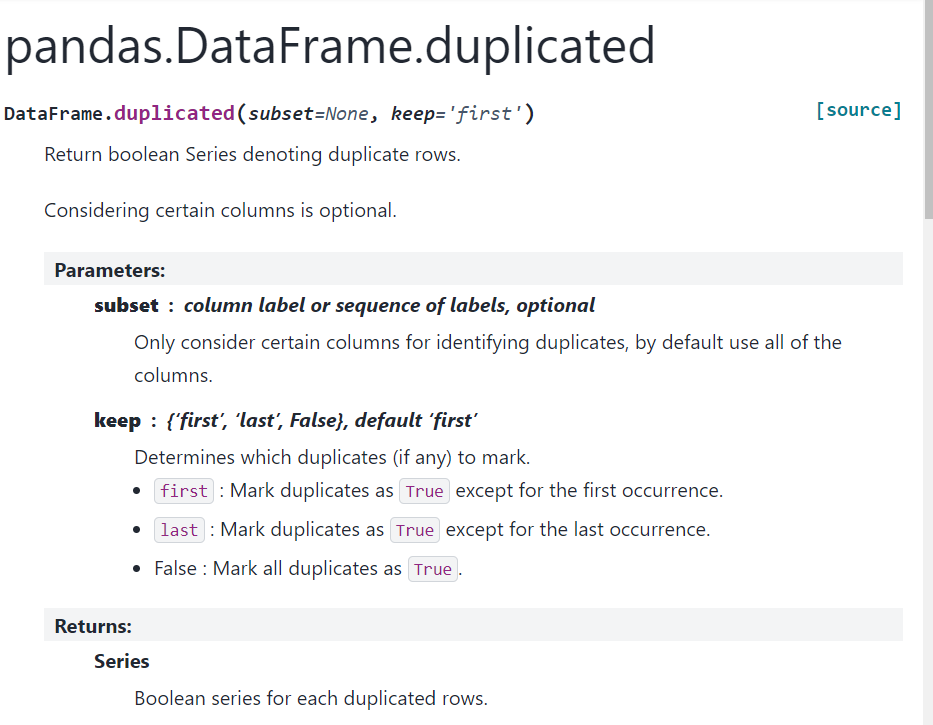
- By default the value of keep is 'first'. 
- The first value will not be displayed; only its duplicates.
- To view the first as well, keep= False
- The row size will increase from 220.

In [16]:
(
flights.loc[flights.duplicated(keep=False)]
)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
33,Jet Airways,15/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 16 Jun,22h,2 stops,In-flight meal not included,10919
49,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150
73,Jet Airways,24/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 25 Jun,13h 30m,2 stops,No info,12819
81,Jet Airways,24/03/2019,Banglore,New Delhi,BLR → DEL,19:55,22:35,2h 40m,non-stop,No info,7229
87,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,04:25 07 Jun,18h 45m,2 stops,No info,13014
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [17]:
# to view all duplicates together, we can sort them by a few parameters
# to verify they are duplicates- so we can drop them
(
flights
.loc[flights.duplicated(keep=False)]
.sort_values(["Airline", "Date_of_Journey", "Source", "Destination"])
)
#can sort with more values as well

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6321,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
9848,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
572,Air India,03/03/2019,Banglore,New Delhi,BLR → DEL,21:10,23:55,2h 45m,non-stop,No info,7591
8168,Air India,03/03/2019,Banglore,New Delhi,BLR → DEL,21:10,23:55,2h 45m,non-stop,No info,7591
1495,Air India,1/04/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,01:20 02 Apr,15h 20m,2 stops,No info,10408
...,...,...,...,...,...,...,...,...,...,...,...
2692,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included,4273
2870,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included,4273
3711,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873
2634,Vistara,24/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,5403


## 3.3 Obervations

- The type of `Date_of_Journey`, `Dep_Time` and `Arrival_Time` should be changed to datetime.
- The type of `Duration` and `Total_Stops` is mixed. It should be numeric type (float or int) but since all are whole numbers- can be int.
- Hence, we need to change the type of 5 features.
- There are 220 duplicates that should be removed.

## 4. Detailed Analysis
- Run through columns one by one

## 4.1 Airline Column

In [18]:
# 1. Airline column
flights.Airline

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10683, dtype: object

In [19]:
#categorical variable- use 'unique' for analysis
flights.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

- Some of the entries here have inconsistent/inaccurate values.
- Vistara and Vistara premium economy- same airline' similarly for jet airways.

In [20]:
(
    flights
    .Airline                                               #access this feature
    .str.replace(" Premium economy", "")                   #on airline feature
    .str.replace("Business", "")
    .str.title()                                           # first alphabet capital- for Multiple Carriers
    .unique()                                              #vistara prem economy and multiple carriers prem economy replaced with blank

)

#all these changes are applied to a copy and not original data- can do method chaining
# implement all these in clean data function

array(['Indigo', 'Air India', 'Jet Airways', 'Spicejet',
       'Multiple Carriers', 'Goair', 'Vistara', 'Air Asia',
       'Jet Airways ', 'Trujet'], dtype=object)

## 4.2 Date of Journey Column

In [21]:
# column 2- Date of Journey
flights.Date_of_Journey
#flights.dtypes

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [22]:
# dtype of date_of_journey should be date time not object

pd.to_datetime(flights.Date_of_Journey, dayfirst= True) #we are passing series where date is first not year

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
10678   2019-04-09
10679   2019-04-27
10680   2019-04-27
10681   2019-03-01
10682   2019-05-09
Name: Date_of_Journey, Length: 10683, dtype: datetime64[ns]

## 4.3 Source Column

In [23]:
#Source and destination columns
flights.Source

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10683, dtype: object

In [24]:
flights.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

## 4.4 Destination Column

In [25]:
flights.Destination

0        New Delhi
1         Banglore
2           Cochin
3         Banglore
4        New Delhi
           ...    
10678     Banglore
10679     Banglore
10680        Delhi
10681    New Delhi
10682       Cochin
Name: Destination, Length: 10683, dtype: object

In [26]:
flights.Destination.unique()
#if needed, can use the same .str.replace method on this column.

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

## 4.5 Total stops column
- conveys same info as captured in source, destination, and total stops
- drop this feature won't affect modelling.

## 4.6 Dep_Time Column


In [27]:
flights.Dep_Time

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10683, dtype: object

- These are in the format hour colon minutes.
- There might be other characters that need cleaning, eg. / instead of :.
- Filter those values using loc.

In [28]:
(
    flights
    .Dep_Time
    .loc[lambda ser: ser.str.contains("[^0-9:]")] #character set in regex
)
# filter out series in Dep_Time that contains (not ^) numbers 0-9 and a :

Series([], Name: Dep_Time, dtype: object)

- Returns empty series- format is ok
- Neat trick for all categorical values
- Now convert to datetime
- dt.time is a unique feature of datetime object.
- its type is again object- will be handled in EDA.

In [29]:
# pd.to_datetime(flights.Dep_Time)- date stamp of today added- need only time
pd.to_datetime(flights.Dep_Time).dt.time

0        22:20:00
1        05:50:00
2        09:25:00
3        18:05:00
4        16:50:00
           ...   
10678    19:55:00
10679    20:45:00
10680    08:20:00
10681    11:30:00
10682    10:55:00
Name: Dep_Time, Length: 10683, dtype: object

## 4.7 Arrival_Time Column

In [30]:
flights.Arrival_Time

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [31]:
(
    flights
    .Arrival_Time
    .loc[lambda ser: ser.str.contains("[^0-9:]")]

)

0        01:10 22 Mar
2        04:25 10 Jun
6        10:25 13 Mar
7        05:05 02 Mar
8        10:25 13 Mar
             ...     
10666    19:00 13 Jun
10667    20:20 13 Mar
10672    19:00 28 Jun
10673    04:25 28 May
10674    21:20 13 Mar
Name: Arrival_Time, Length: 4335, dtype: object

- 4355 series out of 10k have date along with arrival_time.
- Investigate further- split on the first space

In [32]:
(
    flights
    .Arrival_Time
    .loc[lambda ser: ser.str.contains("[^0-9:]")]
    .str.split(" ", n=1) #make only 1 split
    .str.get(1) #date value- 0 gives time value
    .unique()

)

array(['22 Mar', '10 Jun', '13 Mar', '02 Mar', '10 May', '04 Mar',
       '13 Jun', '28 May', '19 Mar', '07 May', '02 Jun', '16 Jun',
       '19 May', '16 May', '28 Jun', '02 May', '28 Mar', '19 Jun',
       '04 Apr', '25 Mar', '07 Mar', '25 Jun', '07 Jun', '25 May',
       '13 May', '16 Mar', '22 May', '10 Apr', '04 Jun', '20 May',
       '28 Apr', '25 Apr', '10 Mar', '19 Apr', '13 Apr', '02 Apr',
       '23 Mar', '22 Apr', '11 May', '07 Apr', '03 May', '08 Mar',
       '03 Mar', '05 Mar', '22 Jun', '04 May', '26 May', '16 Apr',
       '26 Jun', '29 May', '29 Jun', '29 Mar', '23 May', '17 Jun'],
      dtype=object)

- Valid format, no other special characters 
- These dates can be cleaned up
- same as above, see clean_data function directly.

## 4.8 Duration Column
- We want to convert hours and minutes to only minutes.
- remove 'h' and 'm'
- some rows have only h
- are there any rows with only m?

In [33]:
flights.Duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object

In [34]:
(
    flights
    .Duration
    .loc[lambda ser: ~ser.str.contains("m")] #rows that dont contain m; only h
    .unique() #check validity
)

array(['19h', '23h', '22h', '12h', '3h', '5h', '10h', '18h', '24h', '15h',
       '16h', '8h', '14h', '20h', '13h', '11h', '9h', '27h', '26h', '4h',
       '7h', '30h', '21h', '28h', '47h', '6h', '25h', '38h', '34h'],
      dtype=object)

In [35]:
(
    flights
    .Duration
    .loc[lambda ser: ~ser.str.contains("h")]
    .unique()

)
# only one flight with duration 5 minutes- not possible- verify

array(['5m'], dtype=object)

In [36]:
(
    flights
    .Duration
    .loc[lambda ser: ~ser.str.contains("h")]

)

6474    5m
Name: Duration, dtype: object

In [37]:
# verify row 6474 further
flights.iloc[[6474]]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327


- This seems like an invalid data entry.
- If there were multiple value, we could have made them null and then computed later.
- This alone seems to be an error.
- delete this observation, indexed 6474.

In [38]:
(
    flights
    .Duration
    .drop(index= 6474)
    .str.split(" ", n=1, expand= True) #split on the first space

)

,0,1
0,2h,50m
1,7h,25m
2,19h,None
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,None
10681,2h,40m


In [39]:
(
    flights
    .Duration
    .drop(index= 6474)
    .str.split(" ", n=1, expand= True) #split on the first space
    .set_axis(["hour", "minute"], axis= 1) #quick way to name axis
)

,hour,minute
0,2h,50m
1,7h,25m
2,19h,None
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,None
10681,2h,40m


In [40]:
(
    flights
    .Duration
    .drop(index= 6474)
    .str.split(" ", n=1, expand= True) #split on the first space
    .set_axis(["hour", "minute"], axis= 1) #quick way to name axis
    .assign(
        hour= lambda df_:(
            df_
            .hour
            .str.replace("h", "") #update hour value by removing h
        
        )
        
    )
    #.dtypes
    .isna().sum() # to check if there are missing values in each column
)

hour         0
minute    1031
dtype: int64

In [41]:
#convert hour to int 

(
    flights
    .Duration
    .drop(index= 6474)
    .str.split(" ", n=1, expand= True) #split on the first space
    .set_axis(["hour", "minute"], axis= 1) #quick way to name axis
    .assign(
        hour= lambda df_:(
            df_
            .hour
            .str.replace("h", "") #update hour value by removing h
            .astype(int)
        
        )
        
    )
    .dtypes #hour became int
   
)

hour       int32
minute    object
dtype: object

In [42]:
# multiply hour value by 60
(
    flights
    .Duration
    .drop(index= 6474)
    .str.split(" ", n=1, expand= True) #split on the first space
    .set_axis(["hour", "minute"], axis= 1) #quick way to name axis
    .assign(
        hour= lambda df_:(
            df_
            .hour
            .str.replace("h", "") 
            .astype(int)
            .mul(60)
        
        )
        
    )
   
)

,hour,minute
0,120,50m
1,420,25m
2,1140,None
3,300,25m
4,240,45m
...,...,...
10678,120,30m
10679,120,35m
10680,180,None
10681,120,40m


In [43]:
# same thing for minutes

(
    flights
    .Duration
    .drop(index= 6474)
    .str.split(" ", n=1, expand= True) #split on the first space
    .set_axis(["hour", "minute"], axis= 1) #quick way to name axis
    .assign(
        hour= lambda df_:(
            df_
            .hour
            .str.replace("h", "") 
            .astype(int)
            .mul(60)
        
        ),
        minute= lambda df_:(
            df_
            .minute
            .str.replace ("m", "")
        )
        
    )
    .isna().sum() # we have 1031 missing values (in minute column) (have only hour)
   
)


hour         0
minute    1031
dtype: int64

In [44]:
#replace missing values with string 0- fillna 
(
    flights
    .Duration
    .drop(index= 6474)
    .str.split(" ", n=1, expand= True) 
    .set_axis(["hour", "minute"], axis= 1) 
    .assign(
        hour= lambda df_:(
            df_
            .hour
            .str.replace("h", "") 
            .astype(int)
            .mul(60)
        
        ),
        minute= lambda df_:(
            df_
            .minute
            .str.replace ("m", "")
            .fillna("0")
        )
        
    )
    .isna().sum()  #now no missing values
   
)

hour      0
minute    0
dtype: int64

In [45]:
#convert to numeric type -astype
(
    flights
    .Duration
    .drop(index= 6474)
    .str.split(" ", n=1, expand= True) 
    .set_axis(["hour", "minute"], axis= 1) 
    .assign(
        hour= lambda df_:(
            df_
            .hour
            .str.replace("h", "") 
            .astype(int)
            .mul(60)
        
        ),
        minute= lambda df_:(
            df_
            .minute
            .str.replace ("m", "")
            .fillna("0")
            .astype(int)
        )
        
    )
    #.isna().sum()  #now no missing values
    .dtypes
   
)

hour      int32
minute    int32
dtype: object

In [46]:
# add hours and minutes value
(
    flights
    .Duration
    .drop(index= 6474)
    .str.split(" ", n=1, expand= True) 
    .set_axis(["hour", "minute"], axis= 1) 
    .assign(
        hour= lambda df_:(
            df_
            .hour
            .str.replace("h", "") 
            .astype(int)
            .mul(60)
        
        ),
        minute= lambda df_:(
            df_
            .minute
            .str.replace ("m", "")
            .fillna("0")
            .astype(int)
        )
        
    )
    .sum (axis=1) #every value in total minutes
   
)

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Length: 10682, dtype: int64

In [47]:
# VERIFY
(
    flights
    .Duration
    .drop(index= 6474)
    .str.split(" ", n=1, expand= True) 
    .set_axis(["hour", "minute"], axis= 1) 
    .assign(
        hour= lambda df_:(
            df_
            .hour
            .str.replace("h", "") 
            .astype(int)
            .mul(60)
        
        ),
        minute= lambda df_:(
            df_
            .minute
            .str.replace ("m", "")
            .fillna("0")
            .astype(int)
        )
        
    )
    .sum (axis=1) #every value in total minutes
    .rename("duration_minutes") #give name to this series
    .to_frame() #convert to df
    .join(flights.Duration.drop(index=[6474])) #validate side by side
   
)

,duration_minutes,Duration
0,170,2h 50m
1,445,7h 25m
2,1140,19h
3,325,5h 25m
4,285,4h 45m
...,...,...
10678,150,2h 30m
10679,155,2h 35m
10680,180,3h
10681,160,2h 40m


## 4.9 Total_stops column

In [48]:
flights.Total_Stops

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10683, dtype: object

In [49]:
flights.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [50]:
# analysis of null values will be done in EDA
# for now- 
(
    flights
    .Total_Stops
    .replace("non-stop", "0")
    .str.replace(" stop", "") #some have stop, other stops
    .unique()
)

array(['0', '2s', '1', '3s', nan, '4s'], dtype=object)

In [51]:
(
    flights
    .Total_Stops
    .replace("non-stop", "0")
    .str.replace(" stops?", "", regex= True) #s after stop is optional, will look for " stop" or " stops"
    # find any of stop or stops and replace with empty string
    .unique()  
)

array(['0', '2', '1', '3', nan, '4'], dtype=object)

In [52]:
#convert to int
(
    flights
    .Total_Stops
    .replace("non-stop", "0")
    .str.replace(" stops?", "", regex= True) 
    .astype(int)
     
)

ValueError: cannot convert float NaN to integer

### Note:
* This feature has missing values and in Pandas NaN is float- can't convert it to integer.
* astype(int) will not work.
* apply pipe on the current state of the series.

In [53]:
(
    flights
    .Total_Stops
    .replace("non-stop", "0")
    .str.replace(" stops?", "", regex= True) 
    .pipe(lambda ser: pd.to_numeric(ser)) #pandas converts it to float
     
)

0        0.0
1        2.0
2        2.0
3        1.0
4        1.0
        ... 
10678    0.0
10679    0.0
10680    0.0
10681    0.0
10682    2.0
Name: Total_Stops, Length: 10683, dtype: float64

## 4.10 Additional Info Column

In [54]:
flights.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [55]:
#correct spelling mistake- directly in cleaning data

## 5. Cleaning Operations
1. make all column names lowercase.
2. Remove extra spaces from strings.(strip method to remove leading and trailing spaces)- from ALL string features- use 'assign' to do it in one line- 
3. Note: Assign in pandas is used while creating a new column or updating existing ones

In [56]:
def test_clean_data(df):
    return(
        df
        .rename(columns=str.lower)
        #will be applied to all columns without changing original data
        .assign(airline= lambda df_: df_.airline.str.lower())
        # lambda- df_ is the current state of the dataframe.  original dataframe has Airline, df_ has airline.f
        
    )

In [57]:
test_clean_data(flights)

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
0,indigo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,air india,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,jet airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,indigo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,indigo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,air asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,air india,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,jet airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [58]:
def convert_to_minutes(ser): #only duration series will be given
    return(
        ser
        .str.split(" ", n=1, expand= True) 
        .set_axis(["hour", "minute"], axis= 1) 
        .assign(
            hour= lambda df_:(
                df_
                .hour
                .str.replace("h", "") 
                .astype(int)
                .mul(60)

            ),
            minute= lambda df_:(
                df_
                .minute
                .str.replace ("m", "")
                .fillna("0")
                .astype(int)
            )

        )
        .sum (axis=1)
    )

In [59]:
def clean_data(df):
    
    strip_cols= {col: df[col].str.strip() #create dict
                     for col in df.select_dtypes(include='O').columns}#object/str dtype
    
    return(
        df
        .drop(index=[6474])
        .drop_duplicates()
        .assign(**strip_cols) #unpack dict to keywork args in assign
        .rename(columns= str.lower)
        .assign(
            airline= lambda df_:(
            df_
            .airline
                .str.replace(" Premium economy", "")                  
                .str.replace("Business", "")
                .str.title() 
            ), #comma while using multiple assign features
            date_of_journey=  lambda df_: pd.to_datetime(df_.date_of_journey, dayfirst=True),
            dep_time= lambda df_: pd.to_datetime(df_.dep_time).dt.time,
            arrival_time= lambda df_: pd.to_datetime(df_.arrival_time).dt.time,
            #duration= lambda df_: convert_to_minutes(df_.duration)
            duration= lambda df_: df_.duration.pipe(convert_to_minutes),
            total_stops= lambda df_: (
                df_
                .total_stops
                .replace("non-stop", "0")
                .str.replace(" stops?", "", regex= True) 
                .pipe(lambda ser: pd.to_numeric(ser))
            
            ),
            additional_info= lambda df_: df_.additional_info.replace("No info", "No Info")
        )
        .drop(columns= "route")
    )

* Pipe is a very handy Pandas tool.
* Documentation- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pipe.html
* Call pipe on series/df (here df_.duration) 
* Then pass the function in pipe (the function accepts series/df as input)

In [60]:
#clean_data(flights).airline.unique() #verify clean data assign-replace has worked

In [61]:
flights_cleaned= clean_data(flights)
flights_cleaned

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-03-24,Banglore,New Delhi,22:20:00,01:10:00,170,0.0,No Info,3897
1,Air India,2019-05-01,Kolkata,Banglore,05:50:00,13:15:00,445,2.0,No Info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,09:25:00,04:25:00,1140,2.0,No Info,13882
3,Indigo,2019-05-12,Kolkata,Banglore,18:05:00,23:30:00,325,1.0,No Info,6218
4,Indigo,2019-03-01,Banglore,New Delhi,16:50:00,21:35:00,285,1.0,No Info,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,19:55:00,22:25:00,150,0.0,No Info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,20:45:00,23:20:00,155,0.0,No Info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20:00,11:20:00,180,0.0,No Info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,11:30:00,14:10:00,160,0.0,No Info,12648


## 6. Split the Data

In [62]:
flights_final= flights_cleaned.sample(1000)
#randomly sample 1,000 rows from 10,462 to save compute time on Sage maker

In [69]:
X= flights_final.drop(columns= "price")# input for price prediction
y= flights_final.price.copy()

In [70]:
X_, X_test, y_, y_test= train_test_split(X,y, test_size=0.2, random_state= 42) 

# 20% test, 80% training data

In [71]:
X_train, X_val, y_train, y_val= train_test_split(X_, y_, test_size=0.2, random_state= 42)

#of the 80% train data- 20% is validation

In [72]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(640, 9) (640,)
(160, 9) (160,)
(200, 9) (200,)


## 7. Export the Subsets
- save dataframes as a file to local directory

In [73]:
def export_data(X,y,name):
    file_name= f"{name}.csv"
    file_path= os.path.join(PROJECT_DIR, DATA_DIR, file_name)
    
    X.join(y).to_csv(file_path, index= False)
    #index= false so that pandas does not convert index to a column when we convert from df to csv
    
    return pd.read_csv(file_path).head()

In [74]:
export_data(X_train, y_train, "train")

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-27,Delhi,Cochin,11:30:00,18:50:00,440,1.0,No Info,12242
1,Jet Airways,2019-06-12,Delhi,Cochin,02:15:00,19:00:00,1005,1.0,No Info,14714
2,Jet Airways,2019-05-18,Kolkata,Banglore,08:25:00,22:35:00,850,1.0,In-flight meal not included,10844
3,Jet Airways,2019-05-09,Kolkata,Banglore,06:30:00,16:20:00,590,1.0,In-flight meal not included,8586
4,Indigo,2019-03-27,Delhi,Cochin,06:40:00,16:10:00,570,1.0,No Info,6442


In [75]:
export_data(X_val, y_val, "val")

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Vistara,2019-05-15,Kolkata,Banglore,07:10:00,22:40:00,930,1.0,No Info,8452
1,Jet Airways,2019-06-15,Delhi,Cochin,09:40:00,19:00:00,560,2.0,In-flight meal not included,10368
2,Jet Airways,2019-05-12,Kolkata,Banglore,06:30:00,12:00:00,330,1.0,No Info,13941
3,Vistara,2019-05-18,Chennai,Kolkata,17:45:00,20:05:00,140,0.0,No Info,11982
4,Jet Airways,2019-06-27,Delhi,Cochin,19:15:00,19:00:00,1425,1.0,In-flight meal not included,10262


In [76]:
export_data(X_test, y_test, "test")

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-06-12,Kolkata,Banglore,14:15:00,16:45:00,150,0.0,No Info,5510
1,Multiple Carriers,2019-06-27,Delhi,Cochin,08:00:00,21:00:00,780,1.0,No Info,7408
2,Indigo,2019-05-24,Chennai,Kolkata,22:05:00,00:25:00,140,0.0,No Info,5277
3,Jet Airways,2019-05-06,Kolkata,Banglore,08:25:00,18:15:00,590,1.0,No Info,14781
4,Indigo,2019-06-03,Delhi,Cochin,10:35:00,01:30:00,895,1.0,No Info,5883
